<a href="https://colab.research.google.com/github/TimEisenmenger/Ironhack-Final-Project_Picture-Classification/blob/master/Final_Project_Tim_%26_Elina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Final Project - CNN Model for Image Classification***

## ***Detecting Pneumonia from x-ray images:***

*In times of COVID pandemic pneumonia is not a rare disease. It's an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia. Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.*

# ***Loading all Librarys we need***

In [ ]:
#Importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal, Constant
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
import shutil
import itertools
import glob 
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading images from drive
path = "/content/drive/MyDrive/chest_xray/"

# ***Data Overview***

In [ ]:
#Training Set, Test Set and Validation Set

test_data = glob.glob(path + "/test/**/" + "*.jpeg")
train_data = glob.glob(path + "/train/**/" + "*.jpeg")
val_data = glob.glob(path + "/val/**/" + "*.jpeg")

print(f"Training Set has: {len(train_data)} images")
print(f"Testing Set has: {len(test_data)} images")
print(f"Validation Set has: {len(val_data)} images")

Training Set has: 5336 images
Testing Set has: 624 images
Validation Set has: 16 images


In [ ]:
# Pneumonia caused by Bacteria(of test,train and validation set):
bacteria1 = []
for i, elem in enumerate(train_data):#bacteria train data
    if 'bacteria' in elem:
        bacteria1.append(i)

bacteria2 = []
for i, elem in enumerate(test_data):#bacteria test data
    if 'bacteria' in elem:
        bacteria2.append(i)

bacteria3 = []
for i, elem in enumerate(val_data):#bacteria validation data
    if 'bacteria' in elem:
        bacteria3.append(i)

bacteria = bacteria1 + bacteria2 + bacteria3

In [ ]:
# Pneumonia caused by Virus(of test,train and validation set):
virus1 = []
for i, elem in enumerate(train_data):#virus train data
    if 'virus' in elem:
        virus1.append(i)

virus2 = []
for i, elem in enumerate(test_data):#virus test data
    if 'virus' in elem:
        virus2.append(i)

virus3 = []
for i, elem in enumerate(val_data):#virus validation data
    if 'virus' in elem:
        virus3.append(i)

virus = virus1 + virus2 + virus3

In [ ]:
#Patients without Pneumonia (of test,train and validation set):

normal1 = glob.glob(path + "test/NORMAL/" + "*.jpeg")
normal2 = glob.glob(path + "train/NORMAL/" + "*.jpeg")
normal3 = glob.glob(path + "val/NORMAL/" + "*.jpeg")

normal = normal1 + normal2 + normal3

## ***Visualizing the Image Distribution***

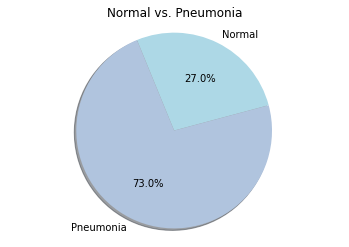

In [ ]:
# Pie chart distribution of normal images vs pneumonia images
Data = [len(normal),(len(virus)+len(bacteria))]

my_labels = 'Normal','Pneumonia'
my_colors = ['lightblue','lightsteelblue','silver']
#my_explode = (0,0)
plt.pie(Data, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors) #explode=my_explode)
plt.title('Normal vs. Pneumonia')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


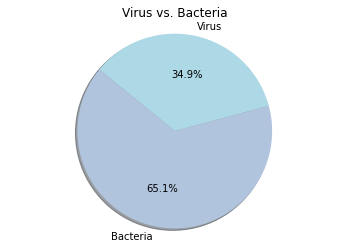

In [ ]:
# Pie chart distribution of virus images vs bacteria images
Data1 = [(len(virus),len(bacteria))]

my_labels = 'Virus','Bacteria'
my_colors = ['lightblue','lightsteelblue','silver']
#my_explode = (0,0)
plt.pie(Data1, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors) #explode=my_explode)
plt.title('Virus vs. Bacteria')
plt.axis('equal')
plt.show()

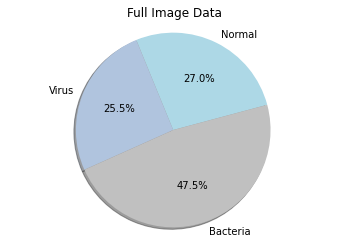

In [ ]:
# Pie chart distribution of all image data
Data2 = [len(normal),len(virus),len(bacteria)]

my_labels = 'Normal','Virus','Bacteria'
my_colors = ['lightblue','lightsteelblue','silver']
#my_explode = (0,0)
plt.pie(Data2, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors) #explode=my_explode)
plt.title('Full Image Data')
plt.axis('equal')
plt.show()

## ***Detecting the smallest image size*** 

In [ ]:
# Collecting image sizes to detect the smallest size
image_size = []

for i in range(len(test_data)):
  image = PIL.Image.open(test_data[i])
  size = image.size
  image_size.append(size)

In [ ]:
for i in range(len(train_data)):
  image = PIL.Image.open(train_data[i])
  size = image.size
  image_size.append(size)

In [ ]:
for i in range(len(val_data)):
  image = PIL.Image.open(val_data[i])
  size = image.size
  image_size.append(size)

In [ ]:
# Print len(image_size) to see if we scanned all Images
print(f"Overall images: {len(image_size)}")
# Print smallest Image Size
print(f"Smallest image size: {min(image_size)}")
# Print largest Image Size
print(f"Largest image size: {max(image_size)}")

Overall images: 5976
Smallest image size: (384, 127)
Largest image size: (2916, 2583)


## ***Visualization of Normal/Bacteria/Virus Images***

Text(0.5, 1.0, 'Virus')

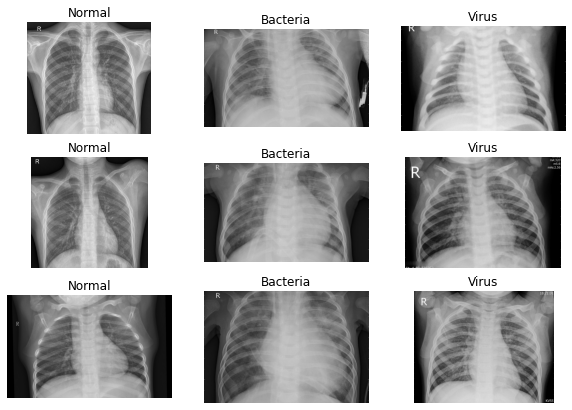

In [ ]:
import cv2
from matplotlib import pyplot as plt
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 3
columns = 3
# reading images
Image1 = cv2.imread("/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0005-0001.jpeg")
Image2 = cv2.imread("/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person101_bacteria_486.jpeg")
Image3 = cv2.imread("/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person25_virus_59.jpeg")
Image4 = cv2.imread("/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0011-0001.jpeg")
Image5 = cv2.imread("/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person128_bacteria_605.jpeg")
Image6 = cv2.imread("/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person57_virus_113.jpeg")
Image7 = cv2.imread("/content/drive/MyDrive/chest_xray/test/NORMAL/NORMAL2-IM-0023-0001.jpeg")
Image8 = cv2.imread("/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person139_bacteria_664.jpeg")
Image9 = cv2.imread("/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person79_virus_148.jpeg")
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(Image1)
plt.axis("off")
plt.title("Normal")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(Image2)
plt.axis("off")
plt.title("Bacteria")
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(Image3)
plt.axis("off")
plt.title("Virus")
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
# showing image
plt.imshow(Image4)
plt.axis("off")
plt.title("Normal")
fig.add_subplot(rows, columns, 5)
plt.imshow(Image5)
plt.axis("off")
plt.title("Bacteria")
fig.add_subplot(rows, columns, 6)
plt.imshow(Image6)
plt.axis("off")
plt.title("Virus")
fig.add_subplot(rows, columns, 7)
plt.imshow(Image7)
plt.axis("off")
plt.title("Normal")
fig.add_subplot(rows, columns, 8)
plt.imshow(Image8)
plt.axis("off")
plt.title("Bacteria")
fig.add_subplot(rows, columns, 9)
plt.imshow(Image9)
plt.axis("off")
plt.title("Virus")





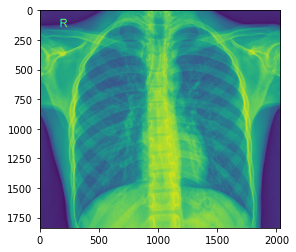

2031 1837


In [ ]:
# Example

image = PIL.Image.open(test_data[0])
plt.imshow(image)
plt.show()
width, height = image.size
print(width, height)

# ***Image Preprocessing***

In [ ]:
# Defining Paths to access our image data

test_path = "/content/drive/MyDrive/chest_xray/test"
train_path = "/content/drive/MyDrive/chest_xray/train"
val_path = "/content/drive/MyDrive/chest_xray/val"

*We decided to take the preprocessing function from VGG16 Model because its awarded and very powerful for image calssification*

In [ ]:
# Earlier we detected 127 es smallest image size parameter and therefore we resize all images to 127x127
# We decided to use a common batch size of 32

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = train_path,target_size= (127,127),classes=["NORMAL","PNEUMONIA"],batch_size=32)
val_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = val_path,target_size= (127,127),classes=["NORMAL","PNEUMONIA"],batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = test_path,target_size= (127,127),classes=["NORMAL","PNEUMONIA"],batch_size=32, shuffle = False)

Found 5336 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### *Defining some weights to our Images in case we need it later for calss balancing*

In [ ]:
# Total count of Pneumonia Images in our Trainset
COUNT_PNEUMONIA = (len(bacteria1)+ len(virus1))
# Total count of Normal Images in our Trainset
COUNT_NORMAL = len(normal2)
# Total Training Set Image count
TRAIN_IMG_COUNT = COUNT_NORMAL + COUNT_PNEUMONIA

print(f"Pneumonia images: {COUNT_PNEUMONIA}")
print(f"Normal images: {COUNT_NORMAL}")
print(f"Total images: {TRAIN_IMG_COUNT}")

Pneumonia images: 3875
Normal images: 1461
Total images: 5336


In [ ]:
# Weight for each class
weight_for_0 = (1/COUNT_NORMAL) * (TRAIN_IMG_COUNT) / 2.0
weight_for_1 = (1/COUNT_PNEUMONIA) * (TRAIN_IMG_COUNT) / 2.0

class_weight = {0:weight_for_0, 1:weight_for_1}
print('Weight of class 0: {:.2f}'.format(weight_for_0))
print('Weight of class 1: {:.2f}'.format(weight_for_1))

Weight of class 0: 1.83
Weight of class 1: 0.69


# ***Modeling (without class balancing)***

## ***First Model***

In [ ]:
# 1. Model with Conv2D,MaxPool2D

model=Sequential([
     Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same",input_shape=(127,127,3)),
     MaxPool2D(pool_size=(2,2),strides=2),
     Flatten(),
     Dense(units=2,activation="softmax"),             
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 254018    
Total params: 254,914
Trainable params: 254,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 1. Model compile
model.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
#1. Model fit
history = model.fit(x=train_batches,validation_data=val_batches,epochs=5,verbose=2)


Epoch 1/5
167/167 - 103s - loss: 17.2190 - accuracy: 0.9413 - val_loss: 3.7388 - val_accuracy: 0.8750
Epoch 2/5
167/167 - 101s - loss: 0.8420 - accuracy: 0.9807 - val_loss: 10.5787 - val_accuracy: 0.8750
Epoch 3/5
167/167 - 101s - loss: 0.7975 - accuracy: 0.9841 - val_loss: 12.2500 - val_accuracy: 0.8125
Epoch 4/5
167/167 - 101s - loss: 0.5952 - accuracy: 0.9882 - val_loss: 2.7808 - val_accuracy: 0.8750
Epoch 5/5
167/167 - 101s - loss: 0.3544 - accuracy: 0.9938 - val_loss: 13.0620 - val_accuracy: 0.8125


*Performance of our first Training Model*

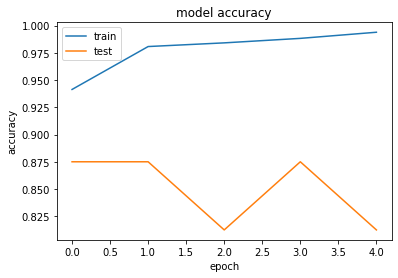

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

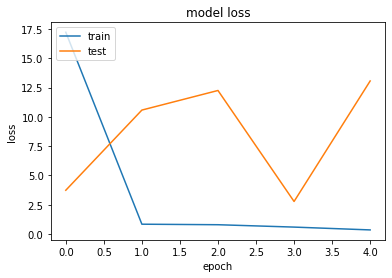

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*Prediction first Model*

In [ ]:
#Predicting model 1
predictions = model.predict(x=test_batches, verbose =0)
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

*Confusion Matrix to see how the model performs*

In [ ]:
#confusion matrix model 1
cm = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [ ]:
# Function to setup the Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 65 169]
 [  1 389]]


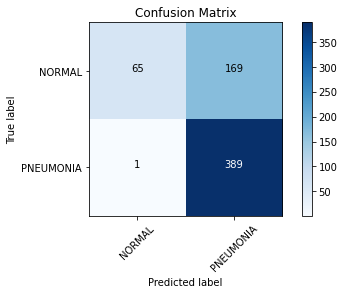

In [ ]:
cm_plot_labels = ['NORMAL','PNEUMONIA']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

*Accuracy, Precision, Recall & F1*

In [ ]:
# Accuracy (TP+TN/TP+FP+FN+TN)
accuracy = (79+388)/(79+2+155+388)

# Precision (TP/TP+FP)
precision = 79 / (79+2)

# Recall (TP/TP+FN)
recall = 79 / (79+155)

# F1 Score (2*(Recall * Precision) / (Recall + Precision))
f_score = (2*(recall * precision) / (recall + precision))

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f_score}")


Accuracy: 0.7483974358974359
Precision: 0.9753086419753086
Recall: 0.33760683760683763
F1 Score: 0.5015873015873016


## ***Second Model***

In [ ]:
# 2. Model with 2x Conv2D, 2x MaxPool2D
model1=Sequential([
     Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same",input_shape=(127,127,3)),
     MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
    MaxPool2D(pool_size=(2,2),strides=2),
     Flatten(),
     Dense(units=2,activation="softmax"),             
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 127, 127, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 123010    
Total params: 142,402
Trainable params: 142,402
Non-trainable params: 0
________________________________________________

In [ ]:
# 2. Model compile
model1.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
#2. Model fit
history1 = model1.fit(x=train_batches,validation_data=val_batches,epochs=10,verbose=2)

Epoch 1/10
167/167 - 148s - loss: 3.1191 - accuracy: 0.9025 - val_loss: 0.5315 - val_accuracy: 0.7500
Epoch 2/10
167/167 - 145s - loss: 0.0880 - accuracy: 0.9696 - val_loss: 0.1388 - val_accuracy: 0.9375
Epoch 3/10
167/167 - 145s - loss: 0.0536 - accuracy: 0.9807 - val_loss: 0.4328 - val_accuracy: 0.7500
Epoch 4/10
167/167 - 145s - loss: 0.0592 - accuracy: 0.9798 - val_loss: 0.2250 - val_accuracy: 0.9375
Epoch 5/10
167/167 - 145s - loss: 0.0756 - accuracy: 0.9741 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 6/10
167/167 - 146s - loss: 0.0367 - accuracy: 0.9865 - val_loss: 0.2824 - val_accuracy: 0.8750
Epoch 7/10
167/167 - 145s - loss: 0.0352 - accuracy: 0.9858 - val_loss: 0.0798 - val_accuracy: 0.9375
Epoch 8/10
167/167 - 147s - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.1262 - val_accuracy: 0.9375
Epoch 9/10
167/167 - 146s - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.6141 - val_accuracy: 0.9375
Epoch 10/10
167/167 - 146s - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.2162 - 

*Performance of our second Training Model*

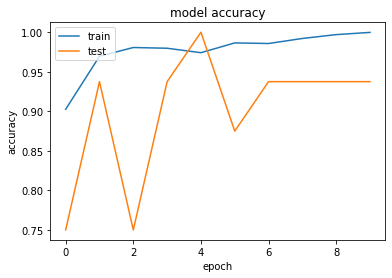

In [ ]:
# summarize history for accuracy

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

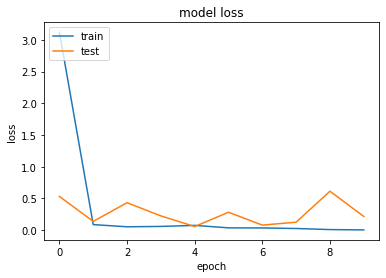

In [ ]:
# summarize history for loss

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*Prediction second Model*

In [ ]:
#Predicting model 2
predictions2 = model1.predict(x=test_batches, verbose =0)

In [ ]:
#confusion matrix model 2
cm1 = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix, without normalization
[[ 65 169]
 [  1 389]]


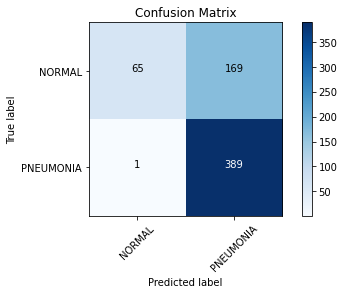

In [ ]:
cm_plot_labels = ['NORMAL','PNEUMONIA']
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title='Confusion Matrix')

*Accuracy, Precision, Recall & F1 Model 2*

In [ ]:
# Accuracy (TP+TN/TP+FP+FN+TN)
accuracy = (79+388)/(79+2+155+388)

# Precision (TP/TP+FP)
precision = 79 / (79+2)

# Recall (TP/TP+FN)
recall = 79 / (79+155)

# F1 Score (2*(Recall * Precision) / (Recall + Precision))
f_score = (2*(recall * precision) / (recall + precision))

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f_score}")

Accuracy: 0.7483974358974359
Precision: 0.9753086419753086
Recall: 0.33760683760683763
F1 Score: 0.5015873015873016


## ***Third Model***

In [ ]:
# 3 Model with Conv2D, MaxPool2D and BatchNormalization
model2=Sequential([
     Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same",input_shape=(127,127,3)),
     MaxPool2D(pool_size=(2,2),strides=2),
     BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)),
    #Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
    #MaxPool2D(pool_size=(2,2),strides=2),
     Flatten(),
     Dense(units=2,activation="softmax"),             
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 127, 127, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 32)        128       
_________________________________________________________________
flatten_2 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 254018    
Total params: 255,042
Trainable params: 254,978
Non-trainable params: 64
_________________________________________________________________


In [ ]:
# Model 3 compile
model2.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Model 3 fit
history2 = model2.fit(x=train_batches,validation_data=val_batches,epochs=10,verbose=2)

Epoch 1/10
167/167 - 110s - loss: 0.8924 - accuracy: 0.9380 - val_loss: 1.8715 - val_accuracy: 0.8125
Epoch 2/10
167/167 - 107s - loss: 0.2339 - accuracy: 0.9769 - val_loss: 0.4583 - val_accuracy: 0.9375
Epoch 3/10
167/167 - 106s - loss: 0.1622 - accuracy: 0.9878 - val_loss: 1.0489 - val_accuracy: 0.9375
Epoch 4/10
167/167 - 113s - loss: 0.1104 - accuracy: 0.9925 - val_loss: 1.1327 - val_accuracy: 0.9375
Epoch 5/10
167/167 - 109s - loss: 0.1407 - accuracy: 0.9948 - val_loss: 0.9940 - val_accuracy: 0.9375
Epoch 6/10
167/167 - 109s - loss: 0.1341 - accuracy: 0.9944 - val_loss: 2.1091 - val_accuracy: 0.8750
Epoch 7/10
167/167 - 109s - loss: 0.0491 - accuracy: 0.9981 - val_loss: 1.6944 - val_accuracy: 0.9375
Epoch 8/10
167/167 - 107s - loss: 0.0398 - accuracy: 0.9983 - val_loss: 1.8793 - val_accuracy: 0.8750
Epoch 9/10
167/167 - 107s - loss: 0.0381 - accuracy: 0.9991 - val_loss: 3.8948 - val_accuracy: 0.8125
Epoch 10/10
167/167 - 106s - loss: 0.0417 - accuracy: 0.9985 - val_loss: 6.1097 - 

*Performance of our third Training Model*

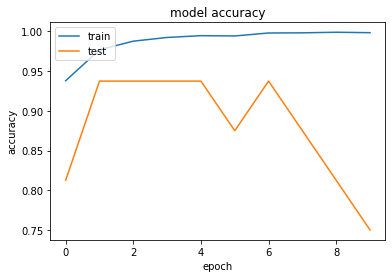

In [ ]:
# summarize history for accuracy

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

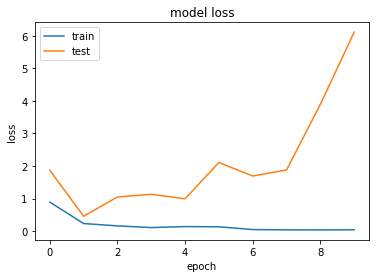

In [ ]:
# summarize history for loss

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*Accuracy, Precision, Recall & F1 Model 3*

In [ ]:
# Accuracy (TP+TN/TP+FP+FN+TN)
accuracy = (79+388)/(79+2+155+388)

# Precision (TP/TP+FP)
precision = 79 / (79+2)

# Recall (TP/TP+FN)
recall = 79 / (79+155)

# F1 Score (2*(Recall * Precision) / (Recall + Precision))
f_score = (2*(recall * precision) / (recall + precision))

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f_score}")

Accuracy: 0.7483974358974359
Precision: 0.9753086419753086
Recall: 0.33760683760683763
F1 Score: 0.5015873015873016


*Prediction third Model*

In [ ]:
#Predicting model 3
predictions3 = model2.predict(x=test_batches, verbose =0)

In [ ]:
#confusion matrix model 3
cm2 = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix, without normalization
[[ 65 169]
 [  1 389]]


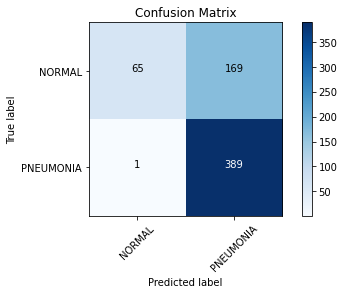

In [ ]:
cm_plot_labels = ['NORMAL','PNEUMONIA']
plot_confusion_matrix(cm=cm2, classes=cm_plot_labels, title='Confusion Matrix')

## ***Setup Callbacks***

*These callbacks give us the chance to safe the best models and access them later.*

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/best-models/best_model.h5", monitor="accuracy", verbose=0, save_best_only=True,mode="min")
early_stopping = EarlyStopping(monitor="accuracy", restore_best_weights=True, patience = 10)
history= CSVLogger("/content/drive/MyDrive/best-models/logs.csv", separator = ",")


# ***Handling the Class Imbalance***

*In order to counteract the class imbalance we have chosen to upsamle class "NORMAL" and to downsample class "Pneumonia".
To know the sample size we calculated the median difference between both classes inside our Training Set.*

In [ ]:
# Calculating the median difference between our two classes
median_difference = (COUNT_PNEUMONIA - COUNT_NORMAL)/2
print(f"Median difference between Pneumonia and Normal: {median_difference}")

Median difference between Pneumonia and Normal: 1207.0


*We decided to make two new folders.* <br>
*- new_train/NORMAL for Upsampling* <br>
*- new_train/PNEUMONIA for Downsampling*

In [ ]:
# To get the right amount of NORMAL image data we decided to copy the images twice in the new folder
# First Copy

destination = "/content/drive/MyDrive/chest_xray/files_normal"

for filename in glob.glob((path + "/train/NORMAL/" + "*.jpeg")):
  
    shutil.copy(filename, destination)

In [ ]:
# Second Copy in the same folder

path_normal = "/content/drive/MyDrive/chest_xray/chest_xray/train/NORMAL/"
new_path = "/content/drive/MyDrive/chest_xray/files_normal/"

for filename in glob.iglob(path_normal +  "/*.jpeg" ):
  filename2 = filename[filename.find(("IM")):].split(".")[0] + "-new.jpeg"
  final = new_path + filename2
  shutil.copy(filename, final)

NotADirectoryError: ignored

In [ ]:
# Loop to make 2600 Pneumonia copies

destination2 = "/content/drive/MyDrive/chest_xray/files_pseunomia"

i = 0
for filename in glob.glob("/content/drive/MyDrive/chest_xray/chest_xray/train/PNEUMONIA/" +"*.jpeg"):
  if i <= 2600:
    shutil.copy(filename, destination2)
    i += 1
  else: 
    break

In [ ]:
# See the new Data Balance for our TrainSet
 
normal_data = glob.glob(path + "/new_train/NORMAL/" + "*.jpeg")
pseunomia_data = glob.glob(path + "/new_train/PNEUMONIA/" + "*.jpeg")


print(f"Normal Set has: {len(normal_data)} images")
print(f"pneunomia Set has: {len(pseunomia_data)} images")


Normal Set has: 2591 images
pneunomia Set has: 2601 images


# ***Model after Balancing***

*Few changes on image preprocessing*

In [ ]:
# Test and Validation path stys the same. 
# Swap Trainpath to new Train Data folder

test_path = "/content/drive/MyDrive/chest_xray/test"
train_path_balanced = "/content/drive/MyDrive/chest_xray/new_train"
val_path = "/content/drive/MyDrive/chest_xray/val"

In [ ]:
# Same preprocessing but with different Train Input

train_batches_balanced = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = train_path_balanced,target_size= (127,127),classes=["NORMAL","PNEUMONIA"],batch_size=32)
val_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = val_path,target_size= (127,127),classes=["NORMAL","PNEUMONIA"],batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = test_path,target_size= (127,127),classes=["NORMAL","PNEUMONIA"],batch_size=32, shuffle = False)

Found 5192 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


***Final Model***

In [ ]:
# Final Model with 3 Conv2D, 2 MaxPools, 2 BatchNormalizations, 3 Dropouts, 1 Flatten and 4 Dense Layers.

model_final1=Sequential([
     Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same",input_shape=(127,127,3)),
     MaxPool2D(pool_size=(2,2),strides=2),
     BatchNormalization(),
     Dropout(0.3),
     Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
     MaxPool2D(pool_size=(2,2),strides=2),
     Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
     BatchNormalization(),
     Flatten(),
     Dense(units=256, activation = "relu"),
     Dropout(0.4),
     Dense(units=100,activation="relu"),
     Dropout(0.5),
     Dense(units=16,activation="relu"),
     Dense(units=2,activation="softmax"),             
])
model_final1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 127, 127, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 128)      

In [ ]:
# Final Model Compile

model_final1.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# Final Model fit

history3 = model_final1.fit(x=train_batches_balanced,validation_data=val_batches,epochs=10,verbose=2)

Epoch 1/10


*Train Performance of our Final Model*

In [ ]:
# summarize history for accuracy

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*Prediction*

In [ ]:
#Prediction Final Model

predictions4 = model_final1.predict(x=test_batches, verbose =0)

In [ ]:
# Confusion Matrix Final Model

cm3 = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions2,axis=-1))

Confusion matrix, without normalization
[[123 111]
 [  8 382]]


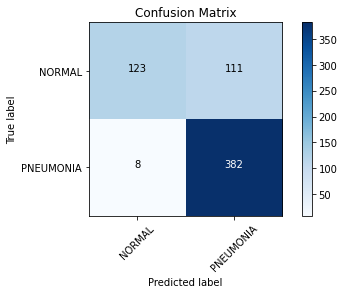

In [ ]:
cm_plot_labels = ['NORMAL','PNEUMONIA']
plot_confusion_matrix(cm=cm3, classes=cm_plot_labels, title='Confusion Matrix')

*Accuracy, Precision, Recall & F1*

In [ ]:
# Accuracy (TP+TN/TP+FP+FN+TN)
accuracy = (123+382)/(123+8+111+382)

# Precision (TP/TP+FP)
precision = 123 / (123+8)

# Recall (TP/TP+FN)
recall = 123 / (123+111)

# F1 Score (2*(Recall * Precision) / (Recall + Precision))
f_score = (2*(recall * precision) / (recall + precision))

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f_score}")